<a href="https://colab.research.google.com/github/christinabrnn/Python-Study/blob/main/BA820/association_rules_unsolved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course: BA820 - Unsupervised and Unstructured ML**

**Notebook created by: Mohannad Elhamod**

#Analyzing Trends at a Grocery Store.

In this notebook, using `mlxtend`, we will analyze the transactions at a grocery store and extract some customer behavior that is of interest to us.

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Load the data

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/elhamod/BA820/main/Hands-on/01-association-rules/Kaggle_GroceryStoreDataSet_modified.csv"

df = pd.read_csv(url, header=None)
# In case there are too many rows to load, you can use this parameter:  nrows = 100)

df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"BREAD,TEA,BOURNVITA"


## EDA (Exploratory Data Analysis) and Preprocessing

Convert the text in the table to a list of items

In [25]:
data_column = df.iloc[:,0]
data = list(data_column.apply(lambda x: x.split(',')))
data

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['', 'BREAD', 'MILK'],
 ['CAFE', 'COKE', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCACOLA', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'CAFE', 'COKE'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'CAFE', 'SUGER'],
 ['BREAD', 'CAFE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

Out of curiousity, what are the unique values?

In [26]:
data_unique = []

for i in data:
  data_unique = data_unique + i

set(data_unique)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'',
 'BISCUIT',
 'BOURNVITA',
 'BREAD',
 'CAFE',
 'COCACOLA',
 'COFFEE',
 'COKE',
 'CORNFLAKES',
 'JAM',
 'MAGGI',
 'MILK',
 'SUGER',
 'TEA'}

Seems we have a couple of things to attend to:

1. an empty string

2. cocacola - coke

3. coffee - cafe

Let's clean up the data.

In [31]:
for indx, lst in enumerate(data):

  lst = [i for i in lst if i]
  lst = ['COFFEE' if i == 'CAFE' else i for i in lst]
  lst = ['COKE' if i == 'COCACOLA' else i for i in lst]

  data[indx] = lst

data

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COKE', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COKE', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COKE'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

## Market Basket Analysis

We now have the data in a basket format. We need to convert it into a encoded format.

In [35]:
# Transform data
te = TransactionEncoder()
transactions = te.fit(data).transform(data)
transactions

# Create a dataframe from the data
df_encoded = pd.DataFrame(transactions, columns = te.columns_)
df_encoded

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BISCUIT,BOURNVITA,BREAD,COFFEE,COKE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,False,True,True,False,False,False,False,False,False,False,True
5,True,False,False,False,False,False,False,True,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


Let's find the most frequent itemsets.

In [45]:
frequent_itemsets = apriori(df_encoded, min_support = 0.0001, use_colnames = True)
frequent_itemsets.sort_values(by = 'support', ascending = True)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
82,0.05,"(TEA, COFFEE, CORNFLAKES, MILK)"
46,0.05,"(TEA, MILK)"
24,0.05,"(BREAD, COKE)"
25,0.05,"(BREAD, CORNFLAKES)"
59,0.05,"(BOURNVITA, COFFEE, SUGER)"
...,...,...
5,0.30,(CORNFLAKES)
10,0.35,(TEA)
0,0.35,(BISCUIT)
3,0.40,(COFFEE)


Let's find the rules of interest.

In [46]:
rules = association_rules(frequent_itemsets,
                          num_itemsets = frequent_itemsets.shape[0],
                          metric = "support", min_threshold = 0.05)
rules.sort_values(by=["support", "confidence"])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
26,(BREAD),(COKE),0.65,0.15,0.05,0.076923,0.512821,1.0,-0.0475,0.920833,-0.730769,0.066667,-0.085973,0.205128
28,(BREAD),(CORNFLAKES),0.65,0.30,0.05,0.076923,0.256410,1.0,-0.1450,0.758333,-0.892308,0.055556,-0.318681,0.121795
75,(BREAD),"(CORNFLAKES, BISCUIT)",0.65,0.15,0.05,0.076923,0.512821,1.0,-0.0475,0.920833,-0.730769,0.066667,-0.085973,0.205128
81,(BREAD),"(BISCUIT, MAGGI)",0.65,0.10,0.05,0.076923,0.769231,1.0,-0.0150,0.975000,-0.461538,0.071429,-0.025641,0.288462
93,(BREAD),"(BISCUIT, SUGER)",0.65,0.05,0.05,0.076923,1.538462,1.0,0.0175,1.029167,1.000000,0.076923,0.028340,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,(SUGER),(BREAD),0.30,0.65,0.20,0.666667,1.025641,1.0,0.0050,1.050000,0.035714,0.266667,0.047619,0.487179
43,(CORNFLAKES),(COFFEE),0.30,0.40,0.20,0.666667,1.666667,1.0,0.0800,1.800000,0.571429,0.400000,0.444444,0.583333
47,(SUGER),(COFFEE),0.30,0.40,0.20,0.666667,1.666667,1.0,0.0800,1.800000,0.571429,0.400000,0.444444,0.583333
35,(MILK),(BREAD),0.25,0.65,0.20,0.800000,1.230769,1.0,0.0375,1.750000,0.250000,0.285714,0.428571,0.553846


Let's filter the rules further.

In [50]:
rules_filtered = rules[(rules['confidence'] > 0.5) & (rules['lift'] >= 1)]
rules_filtered.sort_values(by = 'confidence')

rules_filtered

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5,(COKE),(BISCUIT),0.15,0.35,0.10,0.666667,1.904762,1.0,0.0475,1.95,0.558824,0.250000,0.487179,0.476190
16,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.750000,1.153846,1.0,0.0200,1.40,0.166667,0.214286,0.285714,0.490385
31,(JAM),(BREAD),0.10,0.65,0.10,1.000000,1.538462,1.0,0.0350,inf,0.388889,0.153846,1.000000,0.576923
35,(MILK),(BREAD),0.25,0.65,0.20,0.800000,1.230769,1.0,0.0375,1.75,0.250000,0.285714,0.428571,0.553846
37,(SUGER),(BREAD),0.30,0.65,0.20,0.666667,1.025641,1.0,0.0050,1.05,0.035714,0.266667,0.047619,0.487179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,"(TEA, CORNFLAKES, MILK)",(COFFEE),0.05,0.40,0.05,1.000000,2.500000,1.0,0.0300,inf,0.631579,0.125000,1.000000,0.562500
325,"(COFFEE, CORNFLAKES, MILK)",(TEA),0.05,0.35,0.05,1.000000,2.857143,1.0,0.0325,inf,0.684211,0.142857,1.000000,0.571429
326,"(TEA, COFFEE)","(CORNFLAKES, MILK)",0.05,0.10,0.05,1.000000,10.000000,1.0,0.0450,inf,0.947368,0.500000,1.000000,0.750000
328,"(TEA, MILK)","(COFFEE, CORNFLAKES)",0.05,0.20,0.05,1.000000,5.000000,1.0,0.0400,inf,0.842105,0.250000,1.000000,0.625000


## Let's do some analysis through visualizations.

###Visually identifying the rules that apply most commonly to my customers.

First, some necessary string manipulation to beautify the visualization labels.

In [51]:
rules_filtered['antecedents'] = rules_filtered['antecedents'].apply(lambda a: ','.join(list(a)))
rules_filtered['consequents'] = rules_filtered['consequents'].apply(lambda a: ','.join(list(a)))

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-51-2f02268e6f11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_filtered['antecedents'] = rules_filtered['antecedents'].apply(lambda a: ','.join(list(a)))
<ipython-input-51-2f02268e6f11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Then, I want to see the support for each antecedent-consequent pair.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


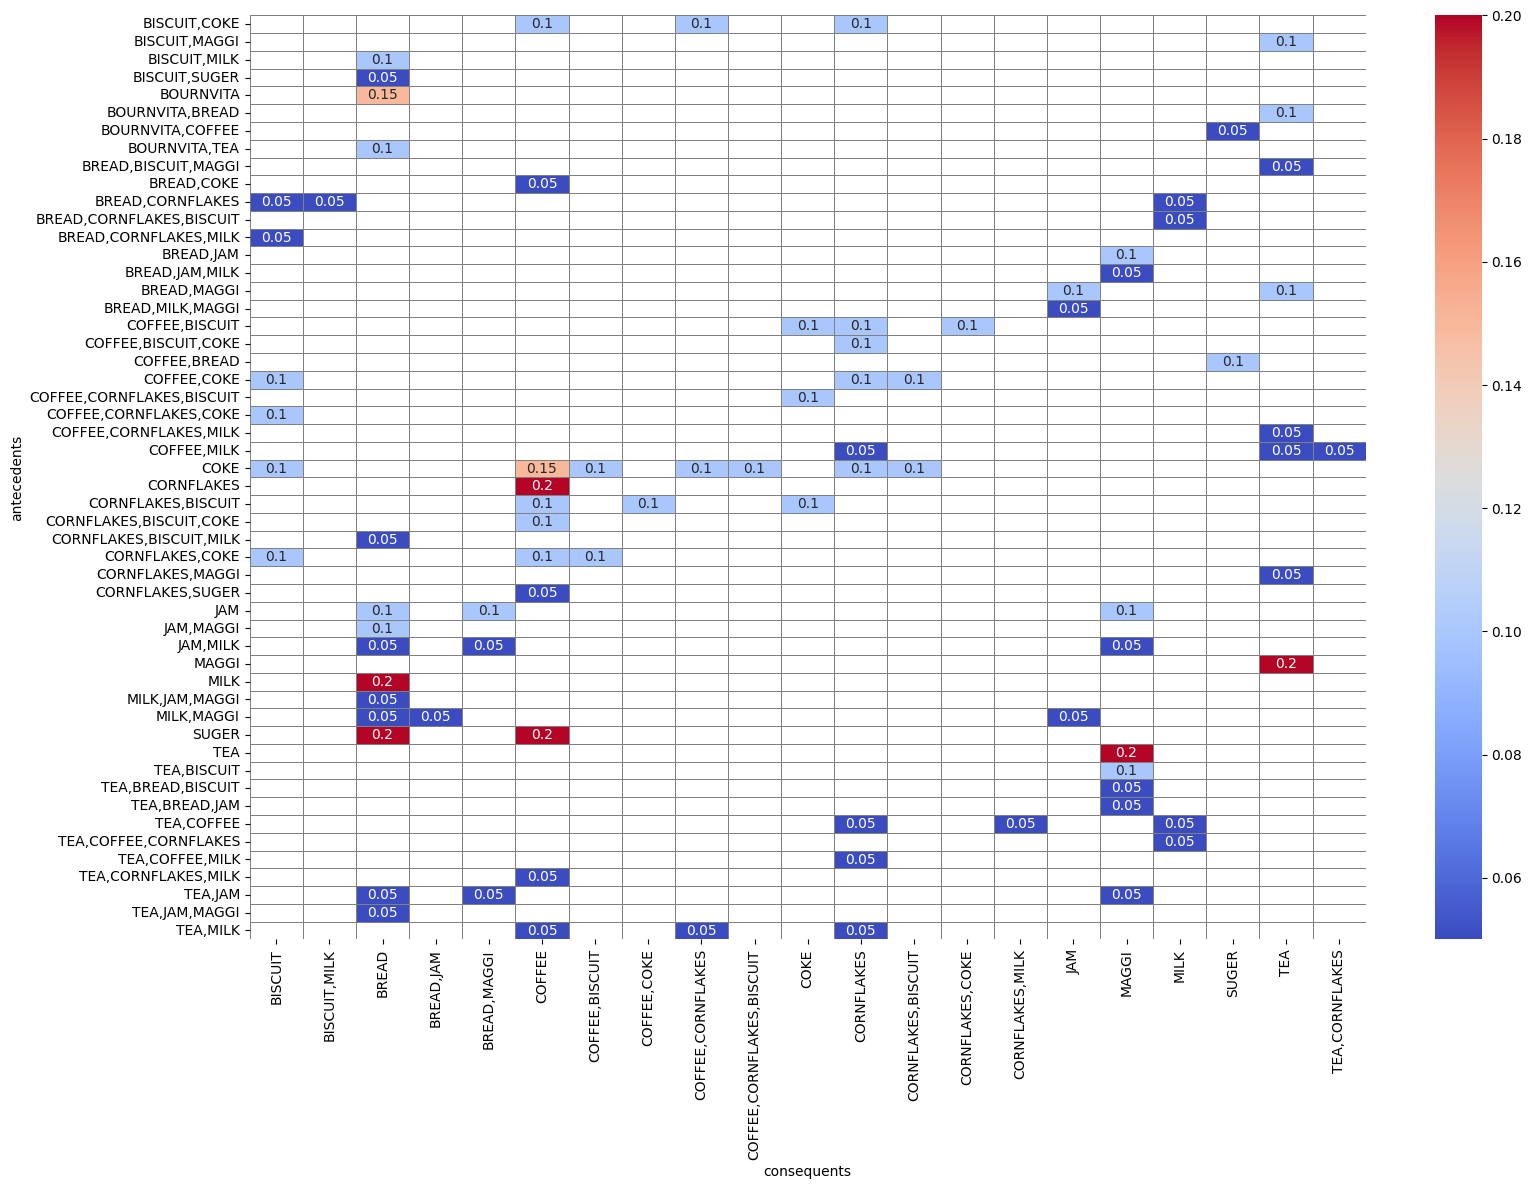

In [53]:
support_table = rules_filtered.pivot(index='antecedents', columns='consequents',
values='support')

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 12))  # Adjust the width and height
sns.heatmap(support_table, annot=True, linewidths=0.5, linecolor='gray', cmap='coolwarm')
plt.show()

## Questions worth investigating

*   Get some stats on the dataset, such as the average number of items per transaction and the 10 most frequent transactions.

*   Filter the rules down to those that are useful for promoting items to customers once they have 3 items in their cart.


*   If you have an excess of tea that is expiring soon in your stock and you want to sell it out quickly, which customer base would you promote it to?

*   How does the computational complexity (i.e., how long it takes the algorithm to run) change as we change the number of transactions and/or our filtering criteria? One could use the `%%timeit`.
